In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import grid
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.datasets import load_breast_cancer

In [7]:
X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)


In [9]:
# Base model
stump = DecisionTreeClassifier(max_depth=1, random_state=42)
stump.fit(X_train,y_train)
y_pred_stump = stump.predict(X_test)
accuracy_score(y_test,y_pred_stump)

0.8951048951048951

In [13]:
# Building AdaBoost
base = DecisionTreeClassifier(max_depth=1, random_state=42)
ada = AdaBoostClassifier(estimator=base,n_estimators=100,learning_rate=.3,random_state=42)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
accuracy_score(y_test,y_pred)

0.958041958041958

In [15]:
print('Classification report\n',classification_report(y_test,y_pred))

Classification report
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.97      0.97      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [35]:
# Effect of estimators
estimators = list(range(10,101,10))+[200,300,500]
max_est = -1
acc = -1
accuracy = []
for i in estimators:
    model = AdaBoostClassifier(estimator=base,random_state=42,n_estimators=i,learning_rate=.3)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    score = accuracy_score(y_test,pred)
    accuracy.append(score)
    if score>acc:
        acc = score
        max_est = i

In [36]:
max_est

40

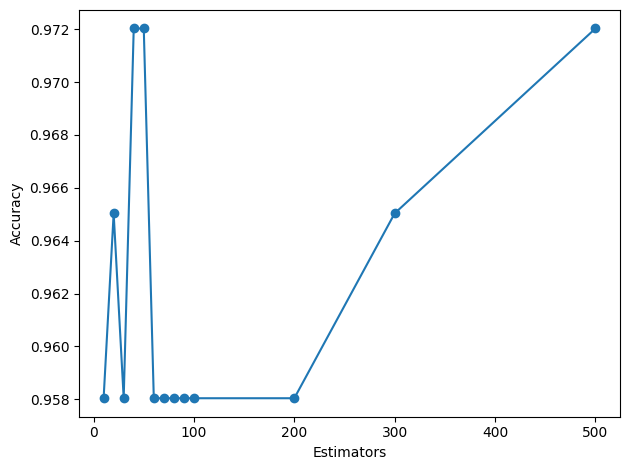

In [27]:
plt.plot(estimators,accuracy,marker='o')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [33]:
# Effect of learning rate
lr = [i / 10 for i in range(1, 21)]
accuracy = []
max_lr = -1
acc = -1
for i in lr:
    model = AdaBoostClassifier(estimator=base,random_state=42,n_estimators=40,learning_rate=i)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    score = accuracy_score(y_test,pred)
    accuracy.append(score)
    if score>acc:
        acc = score
        max_lr = i

In [34]:
max_lr

1.3

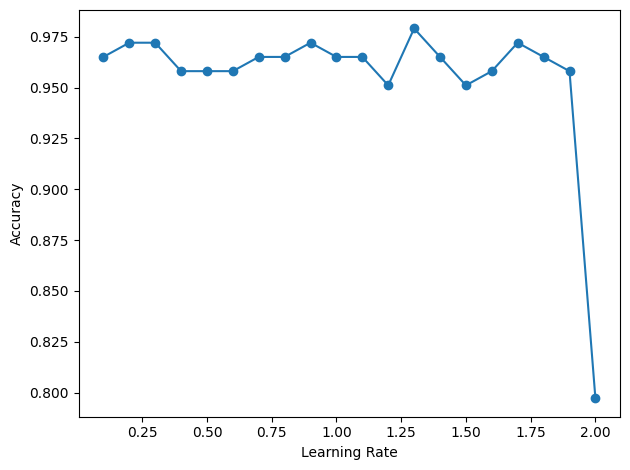

In [32]:
plt.plot(lr,accuracy,marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [49]:
# Getting the maximum value
clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,random_state=42),n_estimators=max_est,learning_rate=max_lr,random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9790209790209791

In [43]:
# Trying with gridsearch CV
param_dist = {
    'n_estimators':estimators,
    'learning_rate':lr,
}
grid = GridSearchCV(estimator=AdaBoostClassifier(estimator=base,random_state=42),param_grid=param_dist,cv=100,n_jobs=-1)
grid.fit(X_train,y_train)
grid_pred = grid.predict(X_test)

In [48]:
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_index_)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   learning_rate=0.6, n_estimators=300, random_state=42)
0.983
{'learning_rate': 0.6, 'n_estimators': 300}
76
